In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn import preprocessing
from scipy.io.wavfile import read
from sklearn.mixture import GaussianMixture
import python_speech_features as mfcc
%matplotlib inline

In [2]:
os.listdir("./dataset/train/")

['2193057_brown%20fox.wav',
 '2193057_dataset.wav',
 '2193057_hello%20world.wav',
 '2193057_one%20two.wav',
 '2193057_python.wav',
 '2193071_brownfox.wav',
 '2193071_dataset.wav',
 '2193071_Helloworld.wav',
 '2193071_onetwo.wav',
 '2193071_python.wav',
 '2193119_brown%20fox.wav',
 '2193119_dataset.wav',
 '2193119_hello%20world.wav',
 '2193119_one two.wav',
 '2193119_python.wav',
 '2193230_BrownFox.wav',
 '2193230_Dataset.wav',
 '2193230_HelloWorld.wav',
 '2193230_OneTwo.wav',
 '2193230_python.wav',
 '2193263_Brown%20fox.wav',
 '2193263_Dataset.wav',
 '2193263_Hello%20world.wav',
 '2193263_One%20two.wav',
 '2193263_Python.wav',
 '2193274_Brown%20fox.wav',
 '2193274_Dataset.wav',
 '2193274_Hello%20world.wav',
 '2193274_One%20two.wav',
 '2193274_Python.wav',
 '2196003_BrownFox.wav',
 '2196003_Dataset.wav',
 '2196003_HelloWorld.wav',
 '2196003_OneTwo.wav',
 '2196003_Python.wav']

In [3]:
def extract_feature(y, sr):
    mfccs_features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [4]:
# speakers
speakers = os.listdir("./dataset/train/")
speakers = [speaker.split("_")[0] for speaker in speakers]
speakers

['2193057',
 '2193057',
 '2193057',
 '2193057',
 '2193057',
 '2193071',
 '2193071',
 '2193071',
 '2193071',
 '2193071',
 '2193119',
 '2193119',
 '2193119',
 '2193119',
 '2193119',
 '2193230',
 '2193230',
 '2193230',
 '2193230',
 '2193230',
 '2193263',
 '2193263',
 '2193263',
 '2193263',
 '2193263',
 '2193274',
 '2193274',
 '2193274',
 '2193274',
 '2193274',
 '2196003',
 '2196003',
 '2196003',
 '2196003',
 '2196003']

In [5]:
# audio features
features = []

files = os.listdir("./dataset/train/")

for file in files:
    path = f"./dataset/train/{file}"
    audio, sr = librosa.load(path, mono=True)
    audio, index = librosa.effects.trim(audio)
    # audio data
    label = int(file.split("_")[0])
    
    mfcc = extract_feature(audio, sr)
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
    rmse = librosa.feature.rms(y=audio)
    spec_cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(audio)
    
    feature = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
    for e in mfcc:
        feature.append(np.mean(e))
        
    feature.append(label)
    features.append(feature)

In [6]:
# header for dataframe
df_columns = ["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
for i in range(13):
    df_columns.append(f"mfcc_{i}")
df_columns.append("speakers")

In [7]:
df = pd.DataFrame(features)
df.columns = df_columns

In [8]:
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,speakers
0,0.508823,0.065071,1462.009514,1459.044721,2650.753997,0.094473,-258.955078,154.073441,-14.797367,5.725764,-2.108068,4.892663,-8.792723,2.605555,-10.735725,-3.137804,-2.669203,-2.221831,-0.829673,2193057
1,0.441626,0.077652,1256.413513,1442.360381,2509.161932,0.063610,-249.670517,152.095901,-13.172818,8.959605,11.089952,-3.239767,-8.708792,5.149476,-11.906062,-7.271626,-6.734125,3.133606,-5.978396,2193057
2,0.521333,0.067279,1198.583267,1336.989997,2235.363486,0.064377,-248.988464,161.977615,-24.411493,9.774876,-1.518021,5.708044,-2.911799,0.318560,-4.796504,-6.063383,-1.668375,2.807030,-0.336714,2193057
3,0.449423,0.063709,1086.628854,1284.643887,1984.899902,0.052570,-273.533875,163.855698,-15.558164,8.845556,4.768162,-1.106675,-6.058097,-1.462643,-11.419047,-8.100589,-8.492698,-3.475071,-2.772712,2193057
4,0.565421,0.040846,1087.505548,1246.144331,1986.213684,0.059362,-287.818634,175.134277,-27.613335,8.153917,5.643142,4.352156,-1.623561,1.468809,-4.073902,-3.539880,-5.182260,0.395981,0.255276,2193057


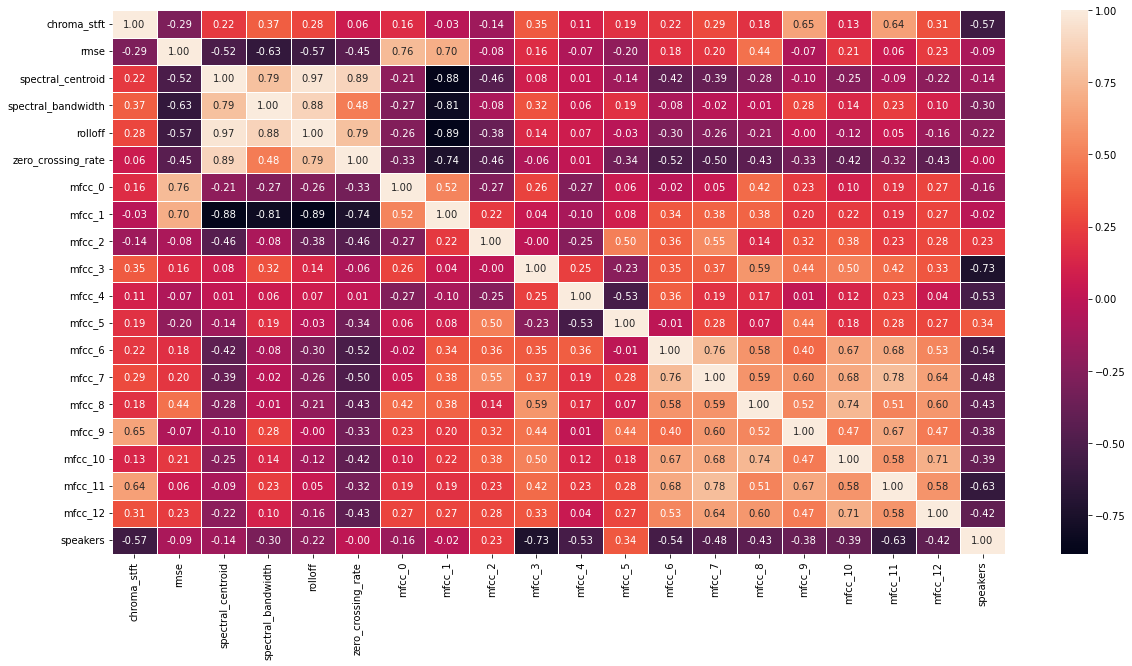

In [9]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f")

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,0.508823,0.065071,1462.009514,1459.044721,2650.753997,0.094473,-258.955078,154.073441,-14.797367,5.725764,-2.108068,4.892663,-8.792723,2.605555,-10.735725,-3.137804,-2.669203,-2.221831,-0.829673
1,0.441626,0.077652,1256.413513,1442.360381,2509.161932,0.063610,-249.670517,152.095901,-13.172818,8.959605,11.089952,-3.239767,-8.708792,5.149476,-11.906062,-7.271626,-6.734125,3.133606,-5.978396
2,0.521333,0.067279,1198.583267,1336.989997,2235.363486,0.064377,-248.988464,161.977615,-24.411493,9.774876,-1.518021,5.708044,-2.911799,0.318560,-4.796504,-6.063383,-1.668375,2.807030,-0.336714
3,0.449423,0.063709,1086.628854,1284.643887,1984.899902,0.052570,-273.533875,163.855698,-15.558164,8.845556,4.768162,-1.106675,-6.058097,-1.462643,-11.419047,-8.100589,-8.492698,-3.475071,-2.772712
4,0.565421,0.040846,1087.505548,1246.144331,1986.213684,0.059362,-287.818634,175.134277,-27.613335,8.153917,5.643142,4.352156,-1.623561,1.468809,-4.073902,-3.539880,-5.182260,0.395981,0.255276


In [12]:
y.head()

0    2193057
1    2193057
2    2193057
3    2193057
4    2193057
Name: speakers, dtype: int64

## Label Encoding

In [13]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape

((28, 19), (7, 19))

In [16]:
y_train.shape, y_test.shape

((28,), (7,))

## Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train, X_test

(array([[ 1.01418582e+00, -2.73555372e-01,  8.51408463e-02,
          1.01173642e+00,  4.17364556e-01, -7.53482058e-01,
          8.90454086e-02, -3.91679845e-01,  5.31509999e-01,
          7.22513608e-01,  2.75437855e-01,  1.01819414e+00,
          1.04999624e+00,  1.26338324e+00,  8.09696329e-01,
          1.68388725e+00,  1.62231817e+00,  1.19256137e+00,
          7.99036329e-01],
        [ 7.96245897e-01, -9.65625872e-01,  1.01574634e+00,
          6.74940402e-01,  8.76435199e-01,  8.68903410e-01,
         -7.14898595e-02, -9.48651368e-01, -1.70036981e+00,
          8.67365267e-01, -2.17849203e-01, -1.07015532e+00,
         -4.33549407e-01, -1.70815868e+00, -1.12390795e+00,
         -1.07399888e+00, -9.55160507e-01, -8.12808745e-01,
         -1.32178386e+00],
        [-2.49957063e-01,  2.97999220e-01, -6.60924846e-01,
          8.93451536e-02, -5.93368150e-01, -8.00799369e-01,
          8.16202043e-01,  9.29810381e-01,  1.25420234e+00,
          1.07789470e+00, -1.00709711e+00,  1.

## Create Model

In [19]:
# categorical_crossentropy
# sparse_categorical_crossentropy 10
from keras import models
from keras import layers
import keras

# model
model = models.Sequential()

# 1st layer
model.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))

# 2nd layer
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))

# 3rd layer
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))

# output layer
model.add(layers.Dense(y_train.shape[0], activation='softmax'))


# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2)

#Train with early stopping to avoid overfitting
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 1s 623ms/step - loss: 3.5745 - accuracy: 0.0357 - val_loss: 3.2204 - val_accuracy: 0.2857
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 3.6415 - accuracy: 0.1071 - val_loss: 3.1829 - val_accuracy: 0.2857
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 3.4538 - accuracy: 0.0357 - val_loss: 3.1416 - val_accuracy: 0.2857
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 3.3398 - accuracy: 0.0714 - val_loss: 3.1011 - val_accuracy: 0.2857
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 3.2577 - accuracy: 0.0714 - val_loss: 3.0544 - val_accuracy: 0.2857
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 2.8903 - accuracy: 0.1786 - val_loss: 3.0073 - val_accuracy: 0.2857
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 2.9658 - accuracy: 0.0714 - val_loss: 2.9596 - val_accuracy: 0.2857
Epoch 8/100
1/1 [==

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 28)                2

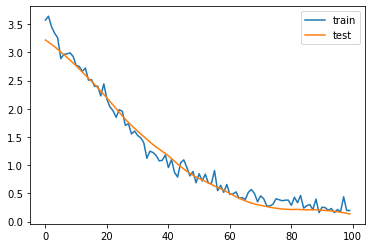

In [21]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [22]:
predict_x = model.predict(X_test) 
predict_x

classes_x = np.argmax(predict_x, axis=1)
classes_x

array([5, 2, 4, 4, 3, 5, 3], dtype=int64)

In [23]:
label_encoder.inverse_transform(classes_x)

array([2193274, 2193119, 2193263, 2193263, 2193230, 2193274, 2193230],
      dtype=int64)

In [24]:
y_test

array([5, 2, 4, 4, 3, 5, 3], dtype=int64)

In [25]:
def predict_speaker(filename):
    
    # audio features
    audio, sr = librosa.load(filename, mono=True)
    audio, index = librosa.effects.trim(audio)
    
    # audio data
    mfcc = extract_feature(audio, sr)
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
    rmse = librosa.feature.rms(y=audio)
    spec_cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(audio)

    features = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
    for e in mfcc:
        features.append(np.mean(e))
        
    features = np.array(features)
    features = features.reshape(1, features.shape[0])
    # header for dataframe
    df_columns = ["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
    for i in range(13):
        df_columns.append(f"mfcc_{i}")

    df = pd.DataFrame(features)
    df.columns = df_columns
    
    X = scaler.transform(df)
    
    # predict
    y_p = model.predict(X)
    y_p = np.argmax(y_p, axis=1)
    return label_encoder.inverse_transform(y_p)

In [26]:
filename = f"./dataset/test/2193263_Awaaaz.wav"
predict_speaker(filename)

array([2193263], dtype=int64)

In [27]:
test_files = f"./dataset/test/"

for file in os.listdir(test_files):
    file_path = test_files + file
    print("Actual roll_no:",file.split("_")[0])
    roll = predict_speaker(file_path)
    print("Predicted roll_no:", roll[0])
    print()

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193263
Predicted roll_no: 2193263

Actual roll_no: 2193263
Predicted roll_no: 2193263

Actual roll_no: 2193263
Predicted roll_no: 2193263

Actual roll_

## Test on random data

In [28]:
test_files = "./dataset/test_random/"

for file in os.listdir(test_files):
    file_path = test_files + file
    print("Actual roll_no:", file.split("_")[0], "test: ", file.split("_")[1:])
    roll = predict_speaker(file_path)
    print("Predicted roll_no:", roll[0])
    print()

Actual roll_no: 2193119 test:  ['aur', 'vai.wav']
Predicted roll_no: 2193263

Actual roll_no: 2193119 test:  ['awaaz.wav']
Predicted roll_no: 2193230

Actual roll_no: 2193119 test:  ['hello', 'this', 'is', 'me.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['in', 'middle.wav']
Predicted roll_no: 2193274

Actual roll_no: 2193119 test:  ['i', 'got.wav']
Predicted roll_no: 2193274

Actual roll_no: 2193119 test:  ['k.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['kaise', 'ho.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['mic', 'testing.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193274 test:  ['1.wav']
Predicted roll_no: 2193057

Actual roll_no: 2193274 test:  ['2.wav']
Predicted roll_no: 2193057

Actual roll_no: 2193274 test:  ['3.wav']
Predicted roll_no: 2193057

Actual roll_no: 2193274 test:  ['4.wav']
Predicted roll_no: 2193057



In [29]:
import tensorflow as tf

In [30]:
tf.keras.models.save_model(model, "./model/model_2.h5")

## Regularization to eliminate overfitting

In [31]:
from tensorflow.keras.regularizers import l2

In [32]:
# categorical_crossentropy
# sparse_categorical_crossentropy 10

factor = 1e-5
rate = 0.3

# model
model2 = models.Sequential()

# 1st layer
model2.add(layers.Dense(100, activation='relu', kernel_regularizer=l2(factor), input_shape=(X_train.shape[1],)))
model2.add(layers.Dropout(rate))

# 2nd layer
model2.add(layers.Dense(200, activation='relu', kernel_regularizer=l2(factor)))
model2.add(layers.Dropout(rate))

# 3rd layer
model2.add(layers.Dense(100, activation='relu', kernel_regularizer=l2(factor)))
model2.add(layers.Dropout(rate))

# output layer
model2.add(layers.Dense(y_train.shape[0], activation='softmax'))


# Learning Process of a model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2)

#Train with early stopping to avoid overfitting
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 3.3365 - accuracy: 0.0000e+00 - val_loss: 3.1646 - val_accuracy: 0.1429
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 3.2392 - accuracy: 0.0000e+00 - val_loss: 3.0807 - val_accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 3.1446 - accuracy: 0.0714 - val_loss: 2.9935 - val_accuracy: 0.1429
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 3.0034 - accuracy: 0.0714 - val_loss: 2.9014 - val_accuracy: 0.1429
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 2.9230 - accuracy: 0.1071 - val_loss: 2.8075 - val_accuracy: 0.2857
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 2.7803 - accuracy: 0.3571 - val_loss: 2.7130 - val_accuracy: 0.2857
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 2.5548 - accuracy: 0.5357 - val_loss: 2.6145 - val_accuracy: 0.4286
Epoch 8/100

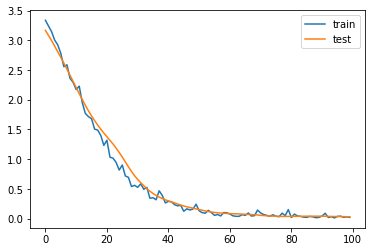

In [33]:
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [34]:
def predict_speaker2(filename):
    
    # audio features
    audio, sr = librosa.load(filename, mono=True)
    audio, index = librosa.effects.trim(audio)
    
    # audio data
    mfcc = extract_feature(audio, sr)
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
    rmse = librosa.feature.rms(y=audio)
    spec_cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(audio)

    features = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
    for e in mfcc:
        features.append(np.mean(e))
        
    features = np.array(features)
    features = features.reshape(1, features.shape[0])
    # header for dataframe
    df_columns = ["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
    for i in range(13):
        df_columns.append(f"mfcc_{i}")

    df = pd.DataFrame(features)
    df.columns = df_columns
    
    X = scaler.transform(df)
    
    # predict
    y_p = model2.predict(X)
    y_p = np.argmax(y_p, axis=1)
    return label_encoder.inverse_transform(y_p)

In [35]:
filename = f"./dataset/test/2193263_Awaaaz.wav"
predict_speaker2(filename)

array([2193263], dtype=int64)

In [36]:
test_files = f"./dataset/test/"

for file in os.listdir(test_files):
    file_path = test_files + file
    print("Actual roll_no:",file.split("_")[0])
    roll = predict_speaker(file_path)
    print("Predicted roll_no:", roll[0])
    print()

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193057
Predicted roll_no: 2193057

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193071
Predicted roll_no: 2193071

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193119
Predicted roll_no: 2193119

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193230
Predicted roll_no: 2193230

Actual roll_no: 2193263
Predicted roll_no: 2193263

Actual roll_no: 2193263
Predicted roll_no: 2193263

Actual roll_no: 2193263
Predicted roll_no: 2193263

Actual roll_

## Retest on random data

In [37]:
test_files = "./dataset/test_random/"

for file in os.listdir(test_files):
    file_path = test_files + file
    print("Actual roll_no:", file.split("_")[0], "test: ", file.split("_")[1:])
    roll = predict_speaker2(file_path)
    print("Predicted roll_no:", roll[0])
    print()

Actual roll_no: 2193119 test:  ['aur', 'vai.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['awaaz.wav']
Predicted roll_no: 2193230

Actual roll_no: 2193119 test:  ['hello', 'this', 'is', 'me.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['in', 'middle.wav']
Predicted roll_no: 2196003

Actual roll_no: 2193119 test:  ['i', 'got.wav']
Predicted roll_no: 2196003

Actual roll_no: 2193119 test:  ['k.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['kaise', 'ho.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193119 test:  ['mic', 'testing.wav']
Predicted roll_no: 2193119

Actual roll_no: 2193274 test:  ['1.wav']
Predicted roll_no: 2193274

Actual roll_no: 2193274 test:  ['2.wav']
Predicted roll_no: 2193274

Actual roll_no: 2193274 test:  ['3.wav']
Predicted roll_no: 2193057

Actual roll_no: 2193274 test:  ['4.wav']
Predicted roll_no: 2193274



In [38]:
tf.keras.models.save_model(model2, "./model/model_3.h5")

## Export labelencoder classes

In [39]:
import joblib

In [40]:
label_encoder.classes_

array([2193057, 2193071, 2193119, 2193230, 2193263, 2193274, 2196003],
      dtype=int64)

In [42]:
# np.save('classes.npy', label_encoder.classes_)

In [47]:
joblib.dump(label_encoder, './preprocessing_helper/label_encoder.joblib')

['./preprocessing_helper/label_encoder.joblib']

## Export Standard scaller

In [46]:
joblib.dump(scaler, './preprocessing_helper/standard_scaler.joblib')

['./preprocessing_helper/standard_scaler.joblib']

In [52]:
def predict_speaker3(filename):
    
    # audio features
    audio, sr = librosa.load(filename, mono=True)
    audio, index = librosa.effects.trim(audio)
    
    # audio data
    mfcc = extract_feature(audio, sr)
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
    rmse = librosa.feature.rms(y=audio)
    spec_cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(audio)

    features = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
    for e in mfcc:
        features.append(np.mean(e))
        
    features = np.array(features)
    features = features.reshape(1, features.shape[0])
    # header for dataframe
    df_columns = ["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
    for i in range(13):
        df_columns.append(f"mfcc_{i}")

    df = pd.DataFrame(features)
    df.columns = df_columns
    
    # scale the features
    scaler = joblib.load("./preprocessing_helper/standard_scaler.joblib")
    X = scaler.transform(df)
    
    # predict
    y_p = model2.predict(X)
    y_p = np.argmax(y_p, axis=1)
    
    # decode the labels
    label_encoder = joblib.load("./preprocessing_helper/label_encoder.joblib")
    return label_encoder.inverse_transform(y_p)

In [53]:
filename = f"./dataset/test/2193263_Awaaaz.wav"
predict_speaker3(filename)

array([2193263], dtype=int64)

In [3]:
path = "./new_file.wav"